<div style="padding : 10px; height : 75px; text-align : center; background-color: green; color: white">
<h1>Analyser les données des employés d'une entreprise </h1>
</div>

### Importer les libraries

In [88]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn
import plotly.express as px

### Charger le fichier des employés

In [89]:
"""
    source du fichier de données : https://www.kaggle.com/datasets/mohithsairamreddy/salary-data?resource=download
"""

emp_data = pd.read_csv("Salary_Data.csv")
emp_data.head()

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0
1,28.0,Female,Master's,Data Analyst,3.0,65000.0
2,45.0,Male,PhD,Senior Manager,15.0,150000.0
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0
4,52.0,Male,Master's,Director,20.0,200000.0


In [90]:
emp_data.shape

(6704, 6)

In [91]:
emp_data.dtypes

Age                    float64
Gender                  object
Education Level         object
Job Title               object
Years of Experience    float64
Salary                 float64
dtype: object

In [92]:
emp_data["Gender"].value_counts()

Male      3674
Female    3014
Other       14
Name: Gender, dtype: int64

In [93]:
emp_data["Education Level"].value_counts()

Bachelor's Degree    2267
Master's Degree      1573
PhD                  1368
Bachelor's            756
High School           448
Master's              288
phD                     1
Name: Education Level, dtype: int64

* Il faut harmoniser les données de la variable 'Education Level'

In [94]:
def transform_education(data): 
    if data == 'phD':
        return 'PhD'
    elif data == "Master's Degree":
        return "Master's"
    elif data == "Bachelor's Degree":
        return "Bachelor's"
    else:
        return data

In [95]:
emp_data["Education Level"] = emp_data["Education Level"].apply(transform_education)
emp_data["Education Level"].value_counts()

Bachelor's     3023
Master's       1861
PhD            1369
High School     448
Name: Education Level, dtype: int64

### Verifier les données manquantes

In [96]:
emp_data.isna().sum().sum()

17

Suppression des données manquantes du fichier

In [97]:
data = emp_data.dropna()

In [98]:
data.isna().sum().sum()

0

In [99]:
data.shape

(6698, 6)

# Analyse exploratoire des données

## Analyse univariée

#### Pour l'age des employés

In [100]:
data["Age"].describe()

count    6698.000000
mean       33.623022
std         7.615784
min        21.000000
25%        28.000000
50%        32.000000
75%        38.000000
max        62.000000
Name: Age, dtype: float64

* la moyenne d'âge dans l'entreprise est de 33 ans 
* l'age minumum est de 21 ans
* le plus agé est de 62 ans

<Axes: >

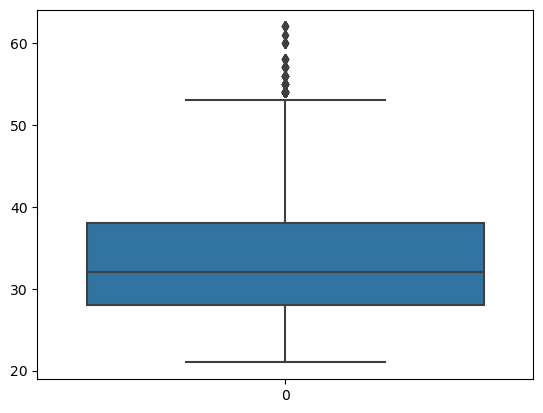

In [101]:
sn.boxplot(data.Age)

* Ce graphique nous montre que 50% des employés ont entre 28 et 38 ans
* 25 % ont plus de 37 ans
* 25 % ont moins de 29 ans
* On a aussi la présence de valeurs extremes qui correspondent à des personne plus agés dans l'entreprise

##### Affichage des valeurs extremes

In [102]:
# On utilsera la méthode des quantiles pour afficher ces valeurs extremes
def get_bornes_ages(data_age): 
    quantiles = data_age.quantile([0.25,0.75])
    q1 = quantiles[0.25]
    q3 = quantiles[0.75]
    ecart = q3-q1
    borne_inf = q1 - 1.5 * ecart
    borne_sup = q3 + 1.5 * ecart
    
    return borne_inf, borne_sup 

In [103]:
borne = get_bornes_ages(data.Age)
borne_inf = borne[0]
borne_sup = borne[1]
print("Borne inférieure : ",borne_inf," | Borne supérieur : ",borne_sup)

Borne inférieure :  13.0  | Borne supérieur :  53.0


In [104]:
# Affichage des personnes les plus agées de l'entreprise
data_outliers = data[(data.Age < borne_inf) | (data.Age > borne_sup)]
data_outliers.sort_values("Age",ascending=False)

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
1225,62.0,Male,PhD,Software Engineer Manager,19.0,200000.0
1236,62.0,Male,PhD,Software Engineer Manager,20.0,200000.0
1305,62.0,Male,PhD,Software Engineer Manager,19.0,200000.0
1258,62.0,Male,PhD,Software Engineer Manager,19.0,200000.0
1304,62.0,Male,PhD,Software Engineer Manager,20.0,200000.0
...,...,...,...,...,...,...
1549,54.0,Male,PhD,Software Engineer Manager,17.0,195000.0
1541,54.0,Male,PhD,Software Engineer Manager,16.0,190000.0
1524,54.0,Male,PhD,Software Engineer Manager,17.0,195000.0
1517,54.0,Male,PhD,Software Engineer Manager,17.0,195000.0


* On a 123 personnes qui sortent du lot en terme d'age

#### Pour l'année d'expérience

In [105]:
data["Years of Experience"].describe()

count    6698.000000
mean        8.095178
std         6.060291
min         0.000000
25%         3.000000
50%         7.000000
75%        12.000000
max        34.000000
Name: Years of Experience, dtype: float64

* L'expérience moyenne dans l'entreprise est de 8 ans 
* l'expérience minimale est de 0 
* l'expérience maximale est de 34 ans

<Axes: xlabel='Years of Experience', ylabel='Count'>

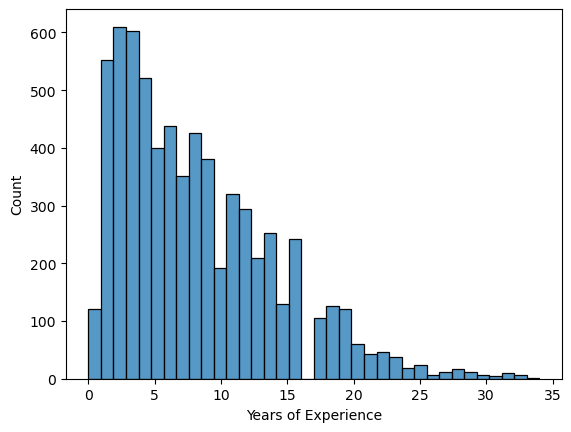

In [106]:
sn.histplot(x=data["Years of Experience"])

<Axes: xlabel='Years of Experience'>

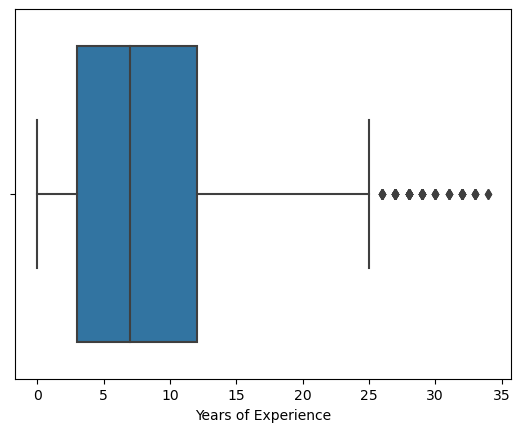

In [107]:
sn.boxplot(x=data["Years of Experience"])

* La majeure partie des employés on entre 0 et 10 ans d'expérience

#### Pour le Salaire

In [108]:
data.Salary.describe()

count      6698.000000
mean     115329.253061
std       52789.792507
min         350.000000
25%       70000.000000
50%      115000.000000
75%      160000.000000
max      250000.000000
Name: Salary, dtype: float64

* la moyenne du salaire dans l'entreprise est de 115329 
* le salaire minumum est de 350 
* le salaire maximum est de 250000

<Axes: >

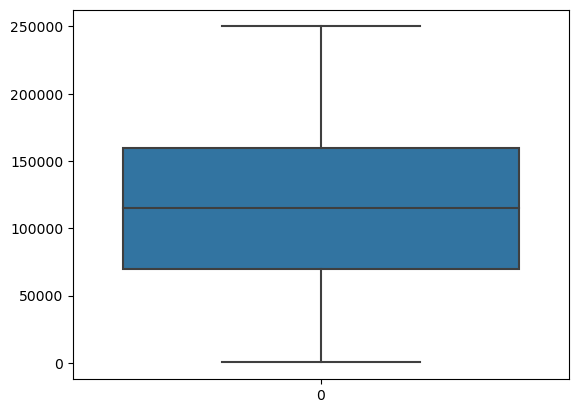

In [109]:
sn.boxplot(data.Salary)

* 50% des employés ont à peu près entre 55000 et 150000

#### Pour le Genre

In [110]:
data.Gender.describe()

count     6698
unique       3
top       Male
freq      3671
Name: Gender, dtype: object

In [111]:
# Le nombre de salarié par sexe
fig = px.histogram(data, x=data.Gender,title="Nombre total de salariés par sexe")
fig.show()

* On a beaucoup plus d'hommes dans l'entreprise

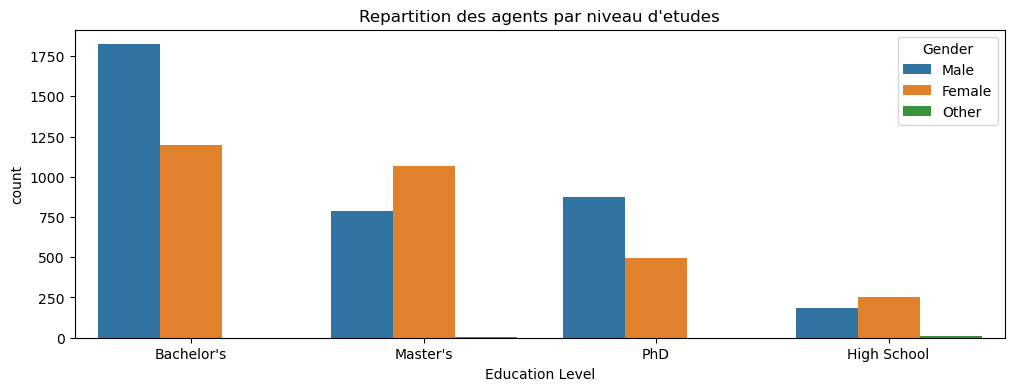

In [112]:
# Le Nombre par niveau d'étude et par sexe 
plt.figure(figsize=(12,4)) 
sn.countplot(data=data, x=data["Education Level"],hue='Gender')
plt.title("Repartition des agents par niveau d'etudes")
plt.show()

In [113]:
# Moyenne des salaires par sexe
data.groupby('Gender')['Salary'].mean()

Gender
Female    107888.998672
Male      121395.697630
Other     125869.857143
Name: Salary, dtype: float64

In [114]:
salary_by_gender = data.groupby('Gender')['Salary'].mean().reset_index()
px.pie(salary_by_gender,values='Salary',names='Gender')

* La moyenne des salaires dans l'entreprise est plutôt équilibrée entre les genres

## Analyse bivariée

In [115]:
# Vérification de la corrélation entre l'année d'expérience et le salaire

Text(0.5, 1.0, 'Salary vs Experience')

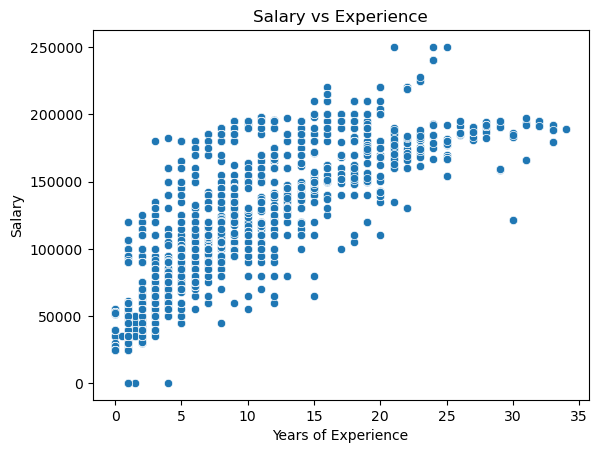

In [116]:
sn.scatterplot(data,x=data["Years of Experience"],y=data.Salary)
plt.title("Salary vs Experience")

In [117]:
data[["Years of Experience","Salary"]].corr()

,Years of Experience,Salary
Years of Experience,1.000000,0.808968
Salary,0.808968,1.000000


* Avec une valeur de 0,8 : la corrélation est forte et positive
* Ce qui veut dire que le salaire évolut en fonction de l'année d'expérience. Plus l'année d'expérience est elévée, plus le salaire est elévé.